In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append("../code/")
from pi_vae import *
from util import *
from keras.callbacks import ModelCheckpoint

## import plot packages
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker

%load_ext autoreload
%autoreload 2
%matplotlib inline

# continuous label data

## load continuous label simulated data
## or run simulate_data.ipynb to generate data

In [2]:
dat = np.load('../data/sim/sim_100d_poisson_cont_label.npz');
u_true = dat['u'];
z_true = dat['z'];
x_true = dat['x'];

In [3]:
x_all = x_true.reshape(50,300,-1);
u_all = u_true.reshape(50,300,-1);

x_train = x_all[:40];
u_train = u_all[:40];

x_valid = x_all[40:45];
u_valid = u_all[40:45];

x_test = x_all[45:];
u_test = u_all[45:];

## fit pi-vae

In [4]:
np.random.seed(666);
vae = vae_mdl(dim_x=x_all[0].shape[-1],
                   dim_z=2,
                   dim_u=u_all[0].shape[-1],
                   gen_nodes=60, n_blk=2, mdl='poisson', disc=False, learning_rate=5e-4)

Instructions for updating:
Colocations handled automatically by placer.
Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 20228       input_1[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
decoder (Model)         

/home/dz2336/anaconda3/lib/python3.6/site-packages/keras/engine/training_utils.py:819: UserWarning: Output encoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to encoder.
  'be expecting any data to be passed to {0}.'.format(name))
/home/dz2336/anaconda3/lib/python3.6/site-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


In [ ]:
model_chk_path = '../results/sim_cont_nflow_2d_666_pivae.h5' ##999, 777
mcp = ModelCheckpoint(model_chk_path, monitor="val_loss", save_best_only=True, save_weights_only=True)
s_n = vae.fit_generator(custom_data_generator(x_train, u_train),
              steps_per_epoch=len(x_train), epochs=1000,
              verbose=1,
              validation_data = custom_data_generator(x_valid, u_valid),
              validation_steps = len(x_valid), callbacks=[mcp]);

In [ ]:
plt.plot(s_n.history['val_loss'][:])

In [7]:
vae.load_weights(model_chk_path);

In [8]:
outputs = vae.predict_generator(custom_data_generator(x_all, u_all),
                                                steps = len(x_all));
# post_mean, post_log_var, z_sample,fire_rate, lam_mean, lam_log_var, z_mean, z_log_var

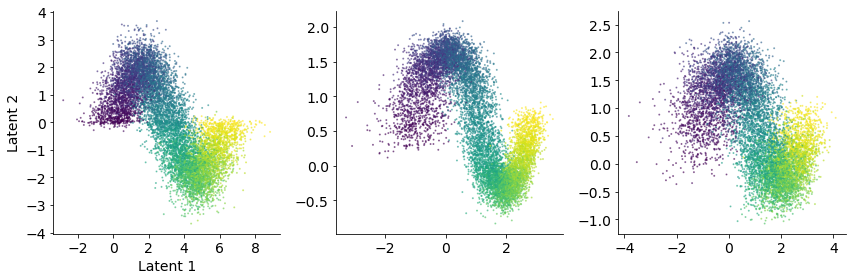

In [9]:
length = 30;
ll = 10000;
c_vec = plt.cm.viridis(np.linspace(0,1,length))
bins = np.linspace(0,2*np.pi,length);
centers = (bins[1:]+bins[:-1])/2;
disc_loc = np.digitize(u_true[:,0],centers);
c_all = c_vec[disc_loc];

fsz = 14;

plt.figure(figsize=(12,4));
ax1 = plt.subplot(1,3,1)
plt.scatter(z_true[:ll,0], z_true[:ll,1], c=c_all, s=1,alpha=0.5);
ax1.set_xlabel('Latent 1',fontsize=fsz,fontweight='normal');
ax1.set_ylabel('Latent 2',fontsize=fsz,fontweight='normal');
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.setp(ax1.get_xticklabels(), fontsize=fsz);
plt.setp(ax1.get_yticklabels(), fontsize=fsz);

ax2 = plt.subplot(1,3,2)
plt.scatter(outputs[0][:ll,0], outputs[0][:ll,1], c=c_all, s=1,alpha=0.5);
#ax2.set_xlabel('Latent 1',fontsize=fsz,fontweight='normal');
#ax2.set_ylabel('Latent 2',fontsize=fsz,fontweight='normal');
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.setp(ax2.get_xticklabels(), fontsize=fsz);
plt.setp(ax2.get_yticklabels(), fontsize=fsz);

ax3 = plt.subplot(1,3,3)
plt.scatter(outputs[6][:ll,0], outputs[6][:ll,1], c=c_all, s=1,alpha=0.5);
#ax3.set_xlabel('Latent 1',fontsize=fsz,fontweight='normal');
#ax3.set_ylabel('Latent 2',fontsize=fsz,fontweight='normal');
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.setp(ax3.get_xticklabels(), fontsize=fsz);
plt.setp(ax3.get_yticklabels(), fontsize=fsz);

plt.tight_layout();